# Introduction to jax-cosmo

In [10]:
%pylab inline
import jax
import jax_cosmo as jc
import jax.numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Let's define a few redshift bins
nz1 = jc.redshift.smail_nz(1., 2., 0.75)
nz2 = jc.redshift.smail_nz(2.5, 2., 1.)
nz3 = jc.redshift.smail_nz(4., 3., 1.5)
nz4 = jc.redshift.smail_nz(5., 4., 2.)

/home/francois/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


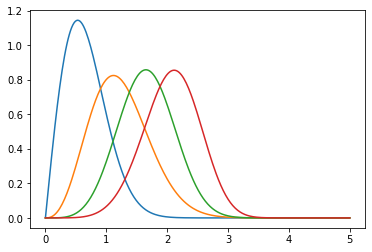

In [3]:
z = np.linspace(0,5,256)
plot(z, nz1(z))
plot(z, nz2(z))
plot(z, nz3(z))
plot(z, nz4(z))

In [4]:
# Define a list of probes
probes = [jc.probes.WeakLensing([nz1, nz2, nz3, nz4]),
          jc.probes.NumberCounts([nz1, nz2, nz3, nz4],
                                 jc.bias.constant_linear_bias(1.))]

In [5]:
cosmo = jc.Planck15()

In [6]:
ell = np.logspace(1,3)
cls = jc.angular_cl.angular_cl(cosmo, ell, probes)
data = cls.flatten()

/home/francois/.local/lib/python3.8/site-packages/jax/lax/lax.py:5190: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/francois/.local/lib/python3.8/site-packages/jax/lax/lax.py:5190: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/francois/.local/lib/python3.8/site-packages/jax/lax/lax.py:5190: UserWarning: Explicitly requested dtype <class 'jax.num

In [7]:
def likelihood(cosmo):
  # Compute mean and covariance of angular Cls
  mu, cov = jc.angular_cl.gaussian_cl_covariance(cosmo, ell, probes)
  # Return likelihood value
  return jc.likelihood.gaussian_log_likelihood(data, mu, cov)

In [11]:
jax.grad(likelihood)(cosmo)

Cosmological parameters: 
    h:        -12393.969 
    Omega_b:  19652.469 
    Omega_c:  -27989.035 
    Omega_k:  -12821.5625 
    w0:       2683.9045 
    wa:       667.07043 
    n:        -20473.672 
    sigma8:   -79472.586

In [ ]:
jax.hessian(likelihood)(cosmo)

/home/francois/.local/lib/python3.8/site-packages/jax/lax/lax.py:5190: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/francois/.local/lib/python3.8/site-packages/jax/lax/lax.py:5190: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/francois/.local/lib/python3.8/site-packages/jax/lax/lax.py:5190: UserWarning: Explicitly requested dtype <class 'jax.num